> identifier sur Kaggle un Kernel EDA sur P7 \
> scoring model for the probability of customer default \
> Home credit, loan \
> develop an interactive dashboard \

# ÉTAPE 1

> Contexte \
> Introduction \
> Énumération des data \
> Description des Données \
> Data architecture \
> Chargement des librairies \
> Chargement des data \


## Contexte

> De nombreuses personnes ont du mal à obtenir des prêts en raison d'historiques de crédit insuffisants ou inexistants. Et, malheureusement, cette population est souvent mise à mal par des prêteurs peu fiables.

> "__*Home Credit*__" s'efforce d'élargir l'inclusion financière de cette population non bancarisée en offrant une expérience d'emprunt positive et sûre. Afin de s'assurer que cette population mal desservie obtienne une expérience de prêt positive, __*Home Credit*__ utilise une __variété de données alternatives__ - y compris les informations issues des télécommunications (des opérateurs de téléphonie) et les transactions diverses - pour __prédire les capacités de remboursement de leurs clients__.

> "__*Home Credit*__" utilise actuellement diverses méthodes statistiques et d'apprentissage automatique pour faire ces prédictions. Grâce à une démarche participative, l'objectif de l'entreprise est de s'assurer que les clients capables de rembourser ne soient pas rejetés et que les prêts soient accordés avec un capital, une échéance et un calendrier de remboursement qui permettront à leurs clients de réussir leur expérience d'emprunteur.

## Introduction

Home Credit est une institution financière non bancaire, fondée en 1997 en République tchèque.

La société opère dans 14 pays (dont les États-Unis, la Russie, le Kazahstan, la Biélorussie, la Chine, l'Inde) et se concentre principalement sur les prêts aux personnes ayant peu ou pas d'historique de crédit qui n'obtiendront pas de prêts ou seront victimes de prêteurs indignes de confiance.

Le groupe Home Credit compte plus de 29 millions de clients, un patrimoine total de 21 milliards d'euros, plus de 160 millions de prêts, majoritairement en Asie et près de la moitié en Chine (au 19-05-2018).

Ils ont mis leurs données à la disposition de la communauté Kaggle et challengent les Kagglers afin de les aider à libérer le plein potentiel de leurs données.

## Data Specifications

__Il y a 10 fichiers .csv au total :__

> <1> HomeCredit_columns_description.csv - 36.51 KB \
> <2> POS_CASH_balance.csv -               374.51 MB \
> <3> application_test.csv -               25.34 MB \
> <4> application_train.csv -              158.44 MB \
> <5> bureau.csv -                         162.14 MB \
> <6> bureau_balance.csv -                 358.19 MB \
> <7> credit_card_balance.csv -            404.91 MB \
> <8> installments_payments.csv -          689.62 MB \
> <9> previous_application.csv -           386.21 MB \
> <10> sample_submission.csv -              523.63 KB \

## Énumération des données

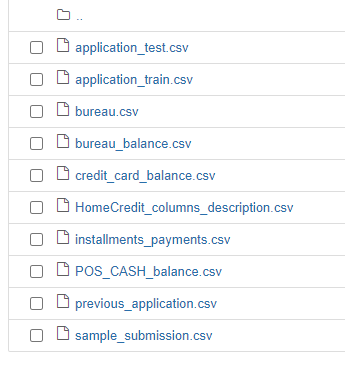

## Description des Données

* application_{train|test}.csv
* application_{train}.csv # lignes: 307 511 columns: 122
* application_{test}.csv  # lignes: 48 744  columns: 121
    Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
    Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.
>
* bureau.csv # lignes: 1 716 428  columns: 17
    Tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
    Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le bureau de crédit avant la date de la demande.
>
* bureau_balance.csv # lignes: 27 299 925  columns: 3
    Soldes mensuels des crédits précédents dans Credit Bureau.
    Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) des lignes .
>
* POS_CASH_balance.csv # lignes: 10 001 358  columns: 8
    Instantanés du solde mensuel des précédents POS (points de vente) et des prêts en espèces que le demandeur avait avec Home Credit.
    Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans laquelle nous avons un historique observable pour les crédits précédents).
>
* credit_card_balance.csv # lignes: 3 840 312  columns: 23
    Instantanés du solde mensuel des cartes de crédit précédentes que le demandeur a avec Home Credit.
    Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).
>
* application_précédente.csv (previous_application.csv) # lignes: 1 670 214  columns: 37
    Toutes les demandes précédentes de crédit immobilier des clients ayant des crédits dans notre échantillon.
    Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.
>
* versements_payments.csv (installments_payments.csv) # lignes: 13 605 401  columns: 8
    Historique de remboursement des crédits précédemment décaissés en Crédit Logement relatifs aux crédits de notre échantillon.
    Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
    Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit Home Credit lié aux crédits de notre échantillon.
>
* AccueilCredit_columns_description.csv (HomeCredit_columns_description.csv) #
    Ce fichier contient les descriptions des colonnes des différents fichiers de données.

## Data architecture

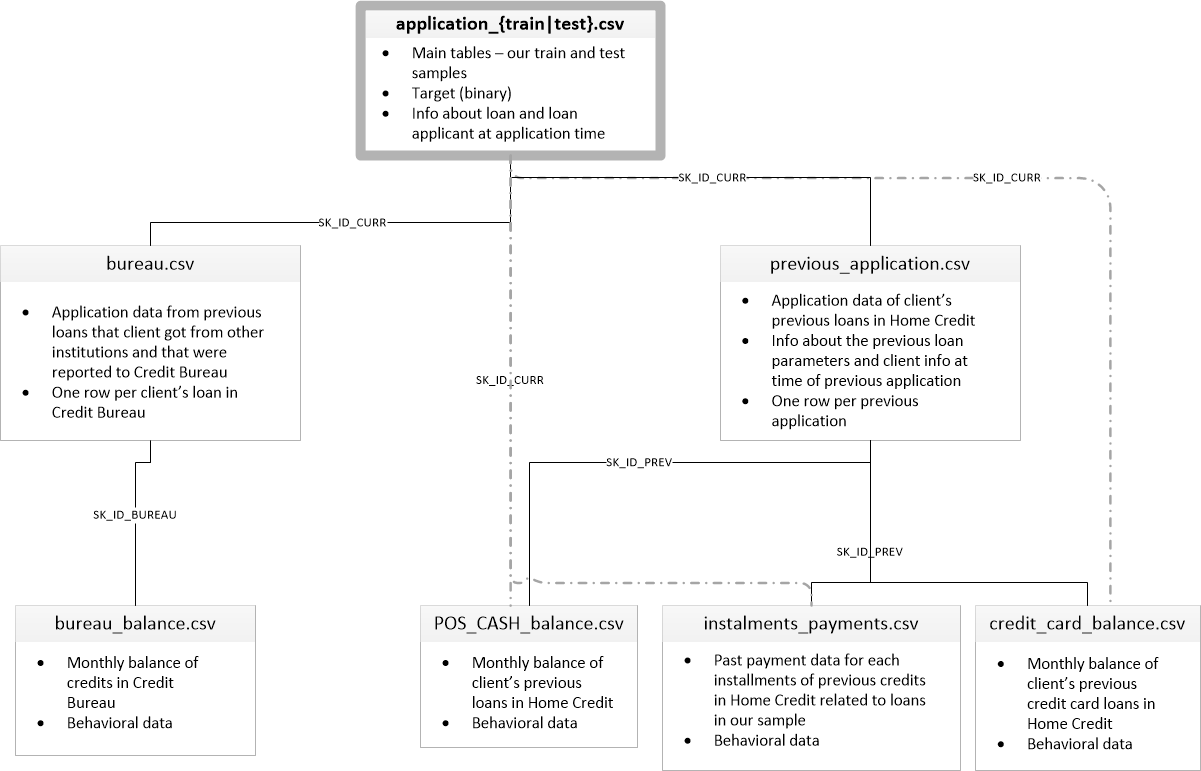

## Chargement des librairies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Chargement des Données 

In [2]:
#Projet+Mise+en+prod+-+home-credit-default-risk

IS_LOCAL = False

import os

if(IS_LOCAL):
    PATH="../P7_Pret_Credit_Conso_VERGE-DEPRE_Thierry/Projet+Mise+en+prod+-+home-credit-default-risk/"
else:
    PATH="../P7_Pret_Credit_Conso_VERGE-DEPRE_Thierry/Projet+Mise+en+prod+-+home-credit-default-risk/"
print(os.listdir(PATH))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

# ÉTAPE 2

> Vérification des data \
    > Aperçu des data \
    > Vérification des données manquantes (missing data) \
    > Vérification des données incohérente (Unbalance data) \
    

## Aperçu des data

In [4]:
print("application_train -  rows/nb_lignes:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows/nb_lignes:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows/nb_lignes:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows/nb_lignes:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows/nb_lignes:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows/nb_lignes:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows/nb_lignes:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows/nb_lignes:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_train -  rows/nb_lignes: 307511  columns: 122
application_test -  rows/nb_lignes: 48744  columns: 121
bureau -  rows/nb_lignes: 1716428  columns: 17
bureau_balance -  rows/nb_lignes: 27299925  columns: 3
credit_card_balance -  rows/nb_lignes: 3840312  columns: 23
installments_payments -  rows/nb_lignes: 13605401  columns: 8
previous_application -  rows/nb_lignes: 1670214  columns: 37
POS_CASH_balance -  rows/nb_lignes: 10001358  columns: 8


In [5]:
application_train.head(2)
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
application_test.head(2)
application_test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

In [7]:
bureau.head(2)
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [8]:
bureau_balance.head(2)
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [9]:
credit_card_balance.head(2)
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [10]:
installments_payments.head(2)
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [11]:
previous_application.head(2)
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [12]:
POS_CASH_balance.head(2)
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

## Vérification des données manquantes (missing data)

In [13]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [14]:
missing_data(application_train).head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [15]:
missing_data(application_test).head(20)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


In [16]:
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [17]:
missing_data(bureau_balance)

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [18]:
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [19]:
missing_data(installments_payments)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [20]:
missing_data(previous_application).head(20)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [21]:
missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


## Vérification des données incohérente (Unbalance data) 

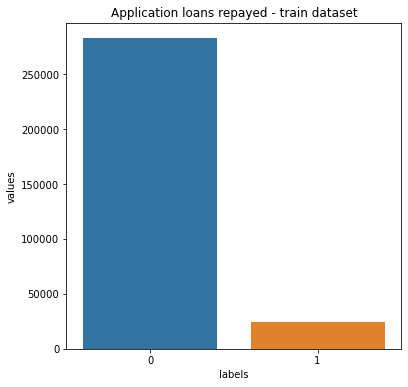

In [22]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

> La valeur "0" signifie que le prêt est remboursé, \
> la valeur "1" signifie que le prêt n'est pas remboursé.

# ÉTAPE 3

> Exploration des data \
> Application data \
> Bureau data \
> Previous application data \
> Contract type \
References

## Exploration des data

### Analyse des Données de l'Application Bancaire

#### Analyse du type de prêts

__Types de prêts__
>
> Voyons le type de prêts contractés et aussi, sur un graphique séparé, le pourcentage des prêts (par type de prêt) avec la valeur "1" (prêt non remboursé).

In [23]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [24]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

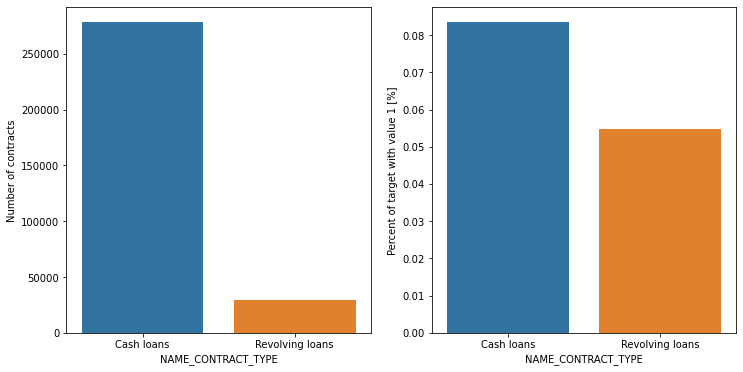

In [25]:
plot_stats('NAME_CONTRACT_TYPE')

__La figure de gauche__
> Les prêts renouvelables ne représentent qu'une petite fraction (10 %) du nombre total de prêts ;

__La figure de droite__
> dans le même temps, une quantité plus importante de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

#### Analyse du genre de la clientèle

__Sexe du client__

> Voyons le sexe des clients et aussi, sur un graphique séparé, le pourcentage des prêts (par sexe du client) avec la valeur "1" (prêt non remboursé).

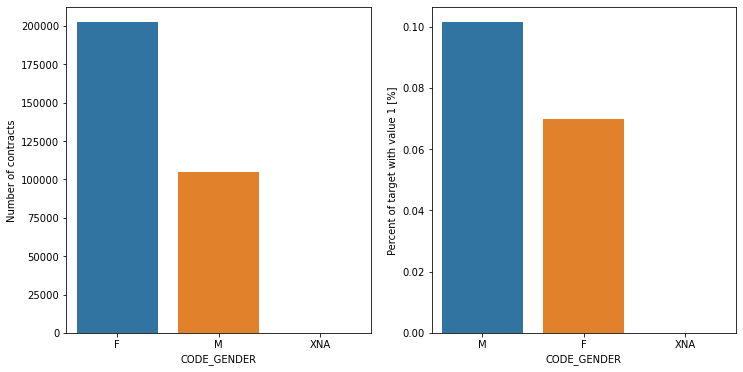

In [26]:
plot_stats('CODE_GENDER')

> Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (~ 10%), par rapport aux femmes (~ 7%).

#### Analyse de la Catégorie Sociale du client

> Client ayant sa propre voiture et son propre bien immobilier. \
> Inspectons les clients possédant une voiture ou un bien immobilier et, sur des graphiques séparées, le pourcentage de la valeur des prêts de ces clients) avec la valeur "1" (prêt non remboursé).

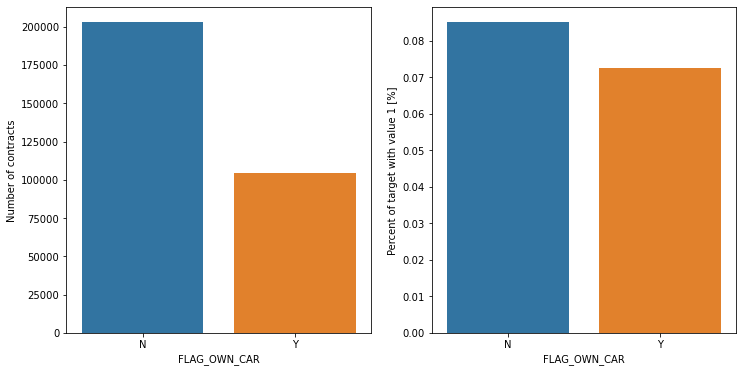

In [27]:
plot_stats('FLAG_OWN_CAR')

> Les clients qui possèdent une voiture sont près de la moitié de ceux qui n'en possèdent pas. Les clients qui possèdent une voiture sont moins susceptibles de ne pas rembourser une voiture que ceux qui en possèdent. Les deux catégories ont des taux de non-remboursement autour de 8%.

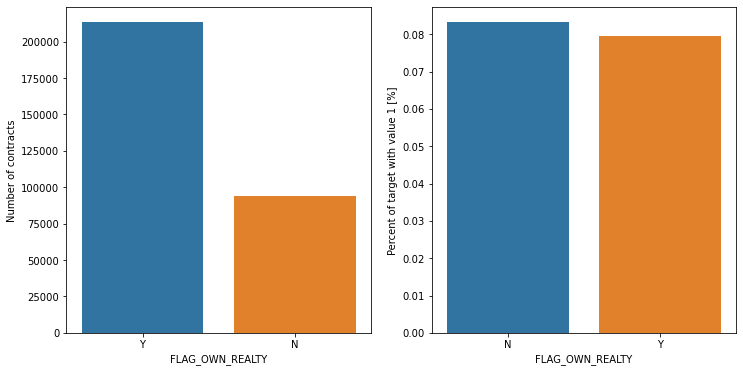

In [28]:
plot_stats('FLAG_OWN_REALTY')

> Les clients qui possèdent des biens immobiliers sont plus du double de ceux qui n'en possèdent pas. Les deux catégories (propriétaire ou non) ont des taux de non-remboursement inférieurs à 8%.

#### Analyse du Status familiale des clients

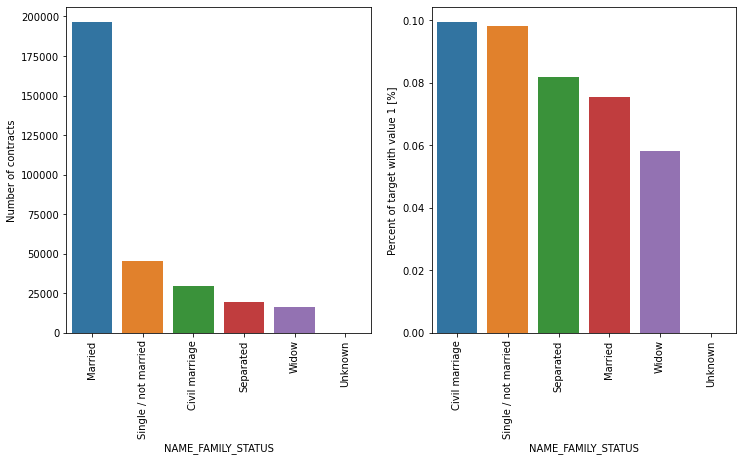

In [29]:
plot_stats('NAME_FAMILY_STATUS',True, True)

> La plupart des clients sont mariés, suivis des célibataires/non mariés et des mariages civils.

> En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), avec Veuve ("widow") le plus bas (l'exception étant Inconnue).

#### Analyse du Nombre d'enfants des clients#

> Voyons quelle est la répartition du nombre d'enfants des clients.

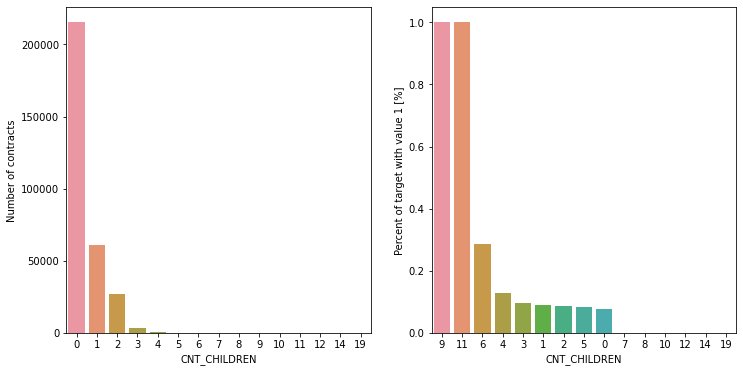

In [30]:
plot_stats('CNT_CHILDREN')

> La plupart des clients qui contractent un prêt n'ont pas d'enfants. Le nombre de prêts associés aux clients avec un enfant est 4 fois plus petit, le nombre de prêts associés aux clients avec deux enfants est 8 fois plus petit ; les clients avec 3, 4 enfants ou plus sont beaucoup plus rares.

> En ce qui concerne le remboursement, les clients sans enfant, 1, 2, 3 et 5 enfants ont des pourcentages de non remboursement autour de la moyenne (10 %). Les clients avec 4 et 6 enfants sont au-dessus de la moyenne en termes de pourcentage de prêts non remboursés (plus de 25% pour les familles avec 6 enfants).

> Quant aux clients avec 9 ou 11 enfants, le pourcentage de prêts non remboursés est de 100 %.

#### Analyse du Nombre de personnes par famille de chaque client

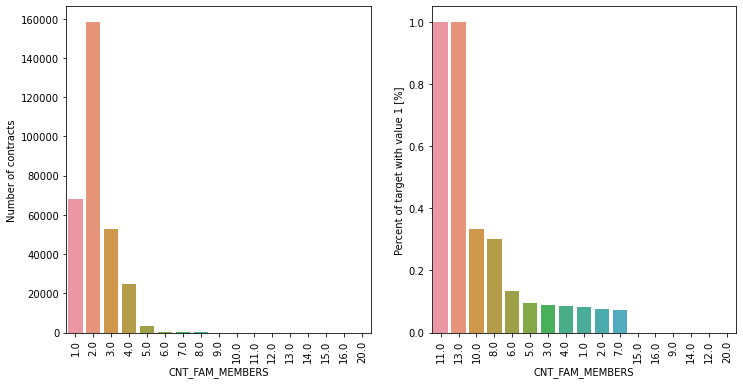

In [31]:
plot_stats('CNT_FAM_MEMBERS',True)

> Les clients avec des membres de la famille de 2 sont les plus nombreux, suivis de 1 (personnes seules), 3 (familles avec un enfant) et 4.

> Les clients dont la taille de la famille est de 11 et 13 ont un taux de non-remboursement de 100 %. D'autres familles de 10 ou 8 membres ont des pourcentages de non-remboursement des prêts supérieurs à 30 %. Les familles de 6 membres ou moins ont des taux de remboursement proches de la moyenne de 10 %.

#### Analyse des Types de revenus des clients

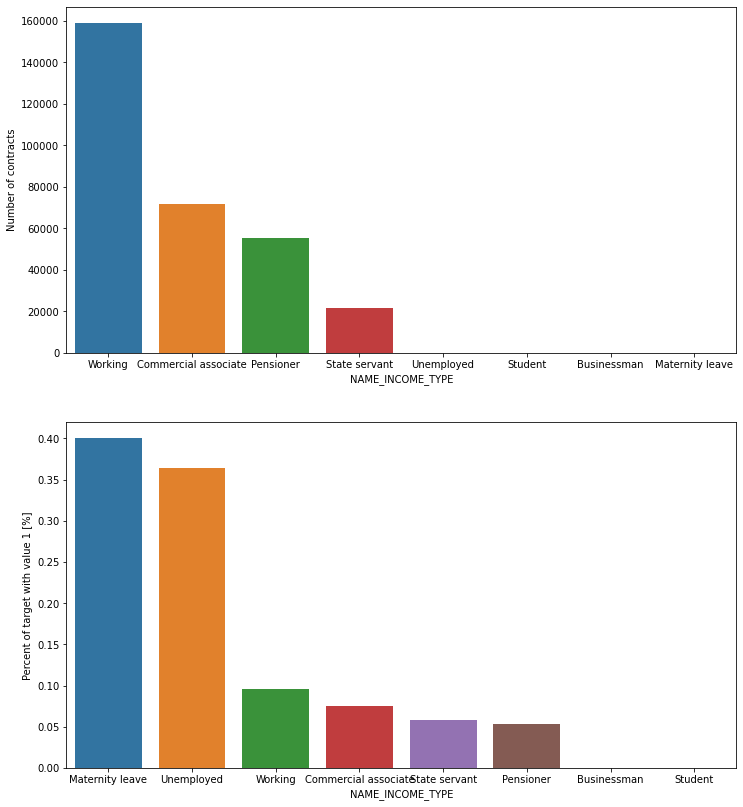

In [32]:
plot_stats('NAME_INCOME_TYPE',False,False)

> La plupart des demandeurs de prêts sont des revenus du travail, suivis par les associés commerciaux, les retraités et les fonctionnaires.

> Les demandeurs ayant le type de revenu Congé de maternité ont un taux de prêts non remboursés de près de 40 %, suivis des Chômeurs (37 %). Le reste des types de revenus est inférieur à la moyenne de 10% pour ne pas rembourser les prêts.

#### Analyse des Professions des clients

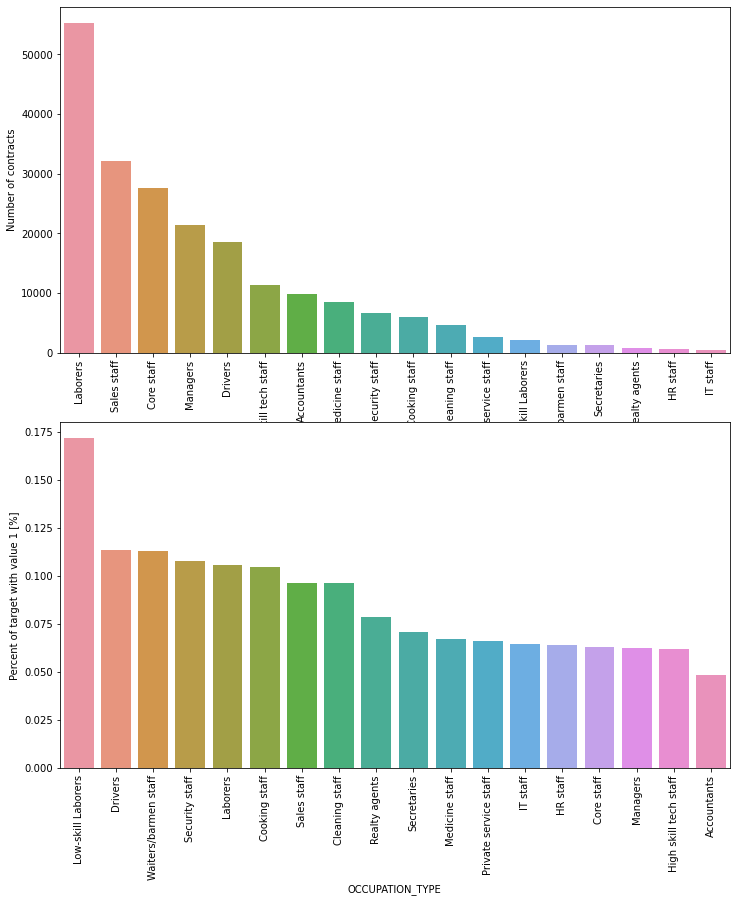

In [33]:
plot_stats('OCCUPATION_TYPE',True, False)

> La plupart des prêts sont contractés par les ouvriers, suivis par le personnel des ventes. Le personnel informatique prend le montant le plus bas des prêts.

> La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (supérieurs à 17 %), suivie des chauffeurs et serveurs/employés de bar, du personnel de sécurité, des ouvriers et du personnel de cuisine.

#### Analyse des Organisations dans lesquelles les clients exercent leur profession

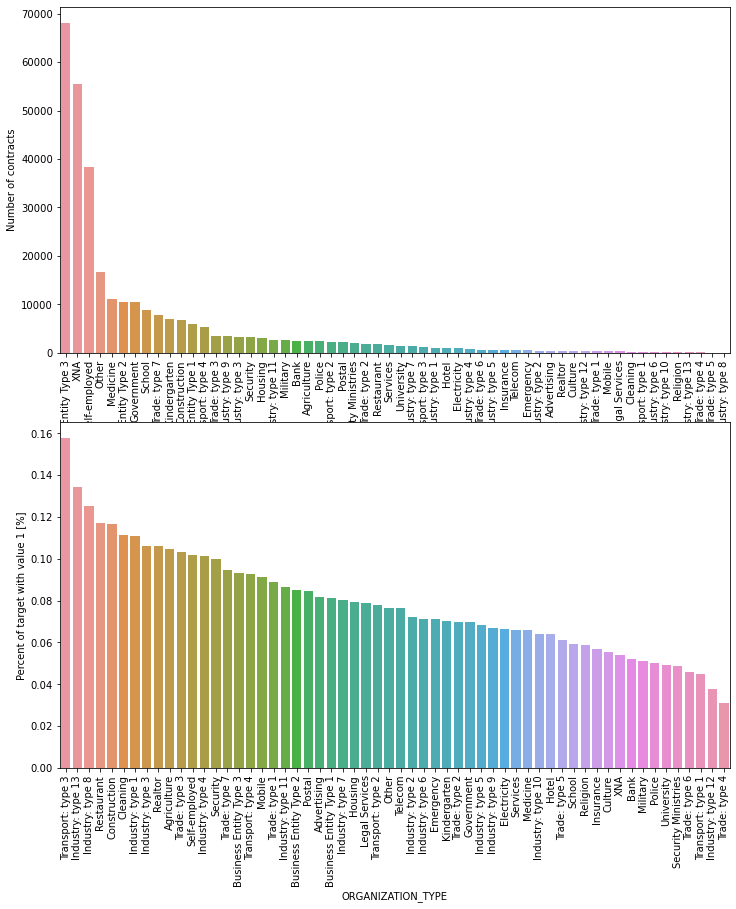

In [34]:
plot_stats('ORGANIZATION_TYPE',True, False)

> Les organisations avec le pourcentage le plus élevé de prêts non remboursés sont Transport : type 3 (16 %), Industrie : type 13 (13,5 %), Industrie : type 8 (12,5%) et Restauration (moins de 12 %).

 #### Analyse du niveau de formation des clients

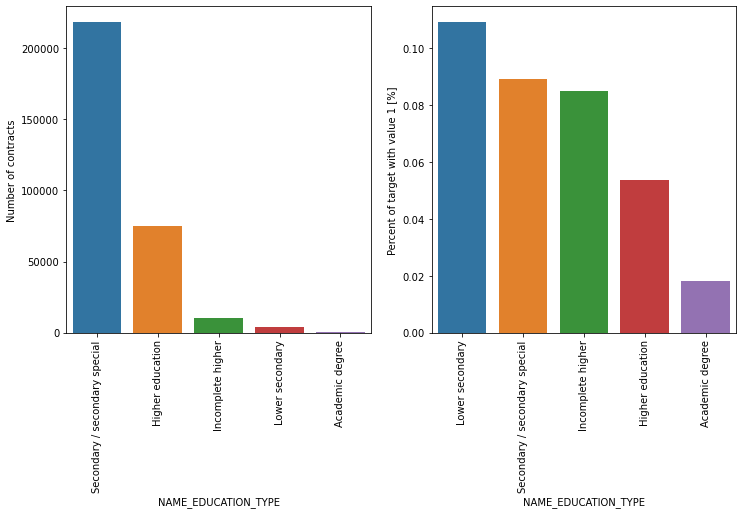

In [35]:
plot_stats('NAME_EDUCATION_TYPE',True)

> La majorité des clients ont une éducation secondaire/secondaire spéciale, suivis des clients avec une éducation supérieure. Seul un très petit nombre a un diplôme universitaire ("Academic degree").

> La catégorie du secondaire inférieur, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11 %). Les personnes titulaires d'un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

#### Analyse du Type de Logement/habitation des  clients

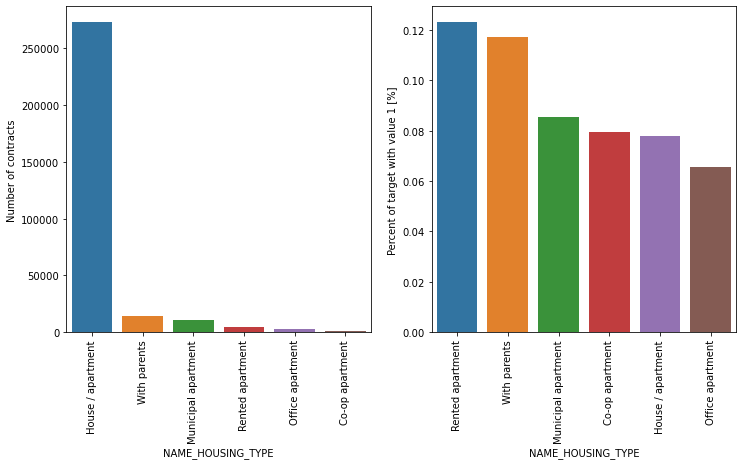

In [36]:
plot_stats('NAME_HOUSING_TYPE',True)

> Plus de 250 000 demandeurs de crédits ont enregistré leur logement en tant que maison/appartement. Les catégories suivantes des types de logement ont un très petit nombre de clients (chez les parents, Appartement municipal).

> Parmi toutes ces catégories, les appartements loués et chez les parents ont un taux de non-remboursement supérieur à 10%.

#### Analyse de la Répartition totale des revenus (revenu total) des clients.

In [37]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.histplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 

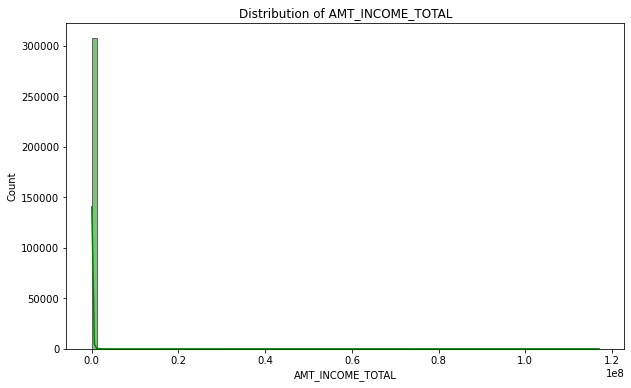

In [38]:
plot_distribution('AMT_INCOME_TOTAL','green')

#### Analyse de la Répartition des Credits (distribution)

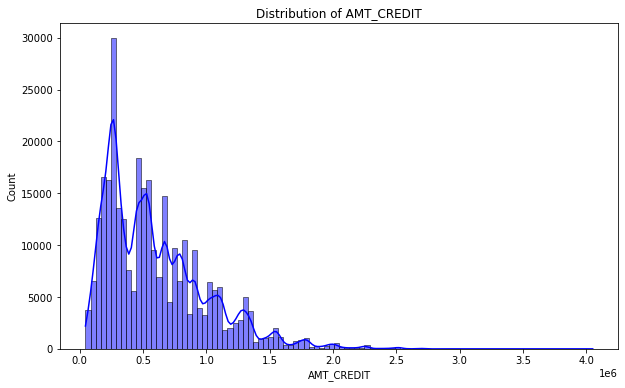

In [39]:
plot_distribution('AMT_CREDIT','blue')

#### Analyse de la Répartition des rentes des Crédits = Annuité (distribution)

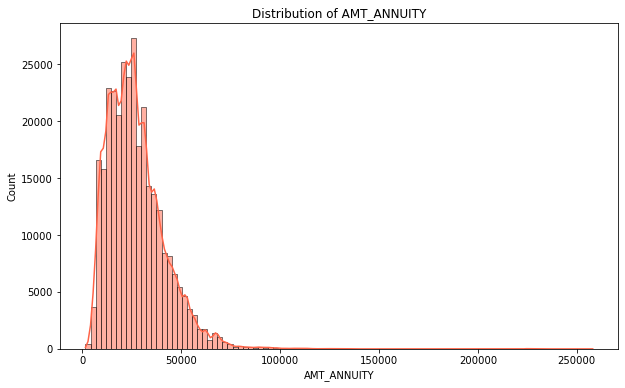

In [40]:
plot_distribution('AMT_ANNUITY','tomato')

#### Analyse des Prix des marchandises (Distribution des prix à la consommation)

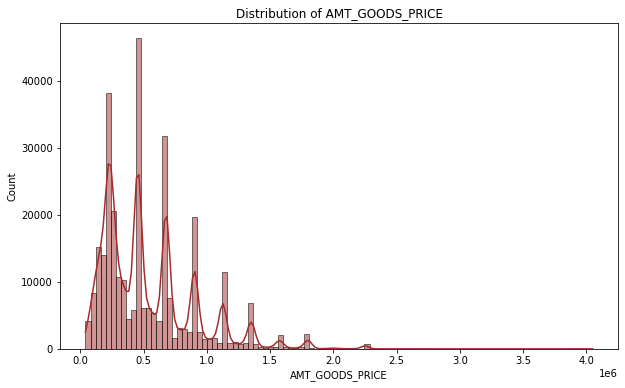

In [41]:
plot_distribution('AMT_GOODS_PRICE','brown')

#### Analyse de la Pyramide des âges (Jours depuis la naissance)

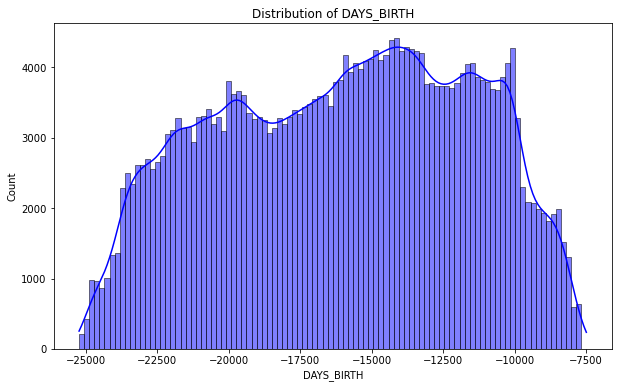

In [42]:
plot_distribution('DAYS_BIRTH','blue')

> La valeur négative signifie que la date de naissance est dans le passé. \
> La tranche d'âge est comprise entre 20 et 68 ans environ.

#### Analyse de la Répartition des Jours d'emploi (distribution)

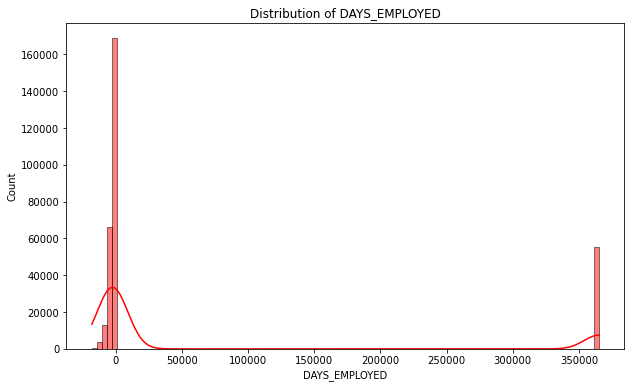

In [43]:
plot_distribution('DAYS_EMPLOYED','red')

> Les valeurs négatives signifient les jours depuis l'emploi et très probablement ces valeurs négatives signifient sans emploi. \
> Il n'est pas clair quelle sera la signification des très grands nombres à l'extrémité (ce n'est pas réaliste un si grand nombre de personnes employées plus de 100 ans).

#### Analyse de la Répartition des Jours d'inscription (distribution)

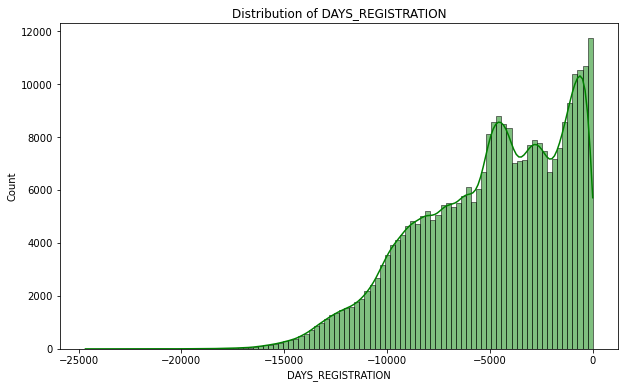

In [44]:
plot_distribution('DAYS_REGISTRATION','green')

#### Analyse de la Répartition des Jours de publication de l'ID  (distribution)

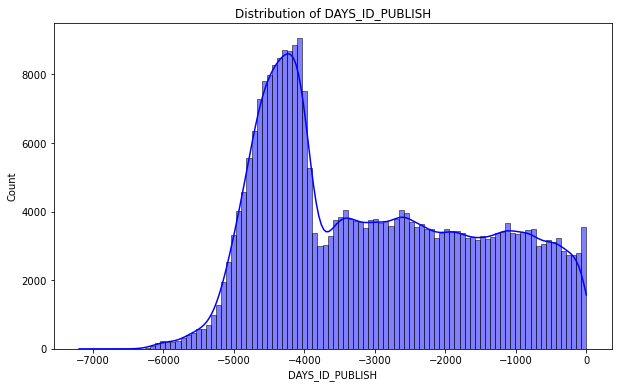

In [45]:
plot_distribution('DAYS_ID_PUBLISH','blue')

#### Analyse Comparative des valeurs d'intervalle entre les cibles 1 ("prêt non remboursé") et 0 ("prêt remboursé")

In [46]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw_adjust=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw_adjust=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 432x288 with 0 Axes>

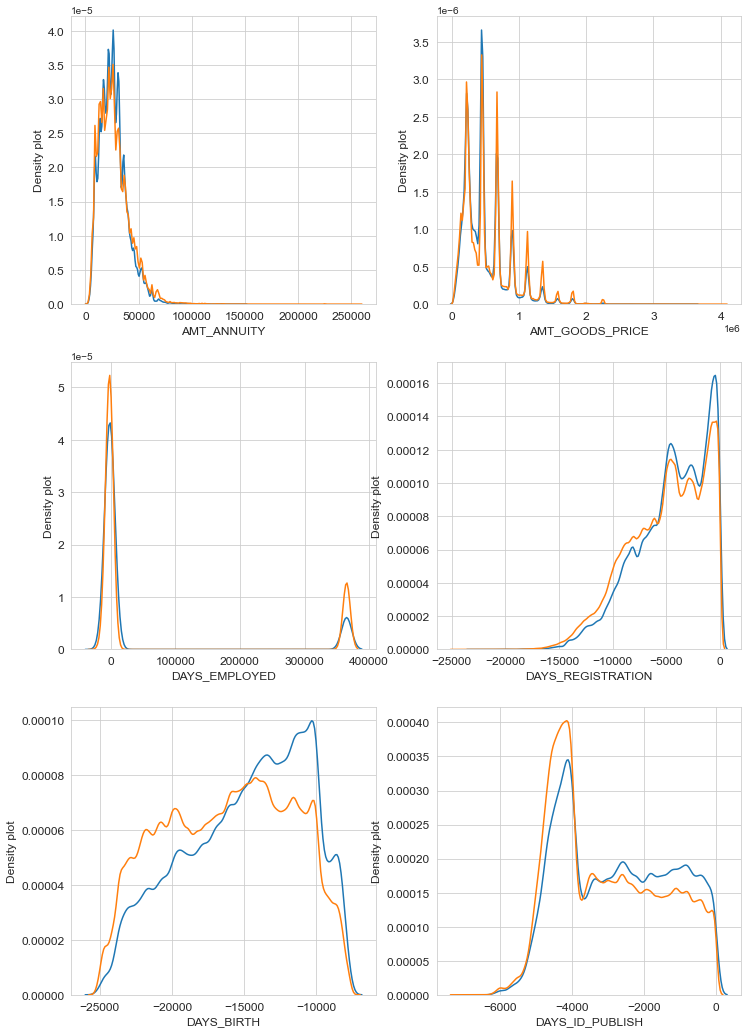

In [47]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

#### Analyse de la localisation du prêt : Le lieu d'enregistrement n'est pas le lieu de résidence ni le lieu de travail

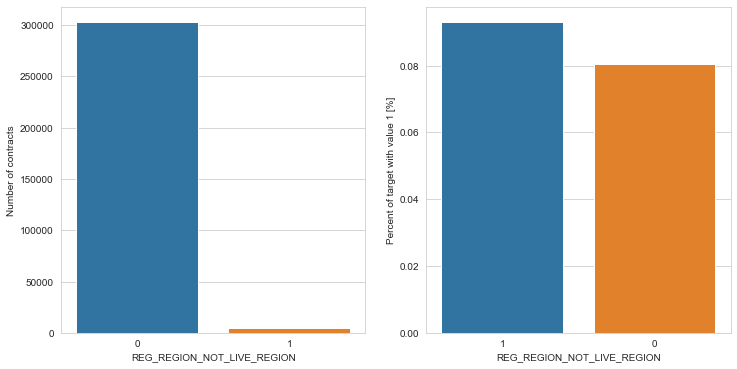

In [48]:
plot_stats('REG_REGION_NOT_LIVE_REGION') # n'est pas le lieu de résidence ni le lieu de travail

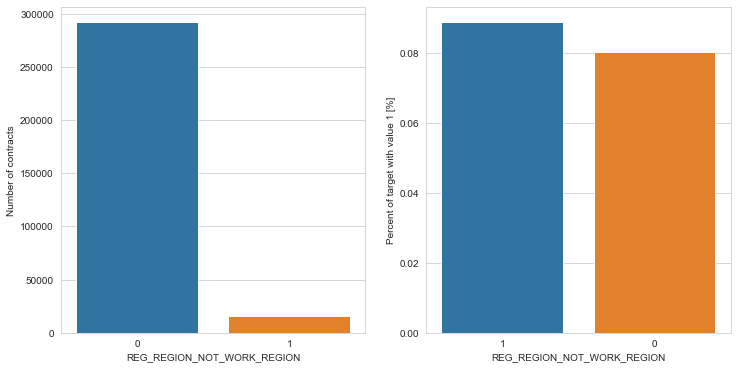

In [49]:
plot_stats('REG_REGION_NOT_WORK_REGION')

> Très peu de personnes enregistrées sont celles qui vivent ou travaillent sur la région. \
> Généralement, le taux de non-retour est légèrement plus important pour ceux qui ne sont pas de la région (légèrement au-dessus de 9%) que les autres, qui vivent ou travaillent sur la région (contre environ 8%)

#### Analyse de la Domiciliation client : La ville d'enregistrement n'est pas le lieu de résidence ni le lieu de travail

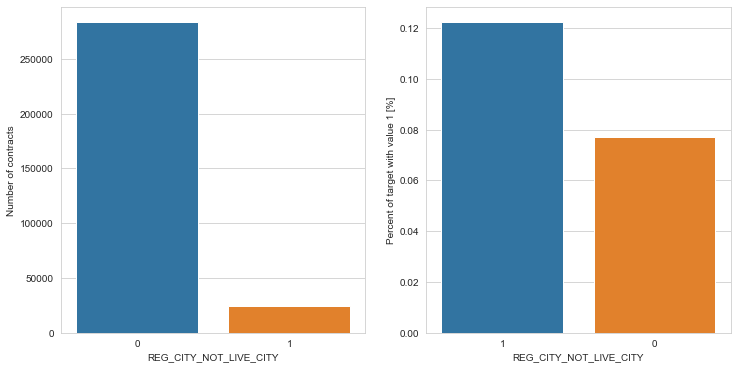

In [50]:
plot_stats('REG_CITY_NOT_LIVE_CITY')

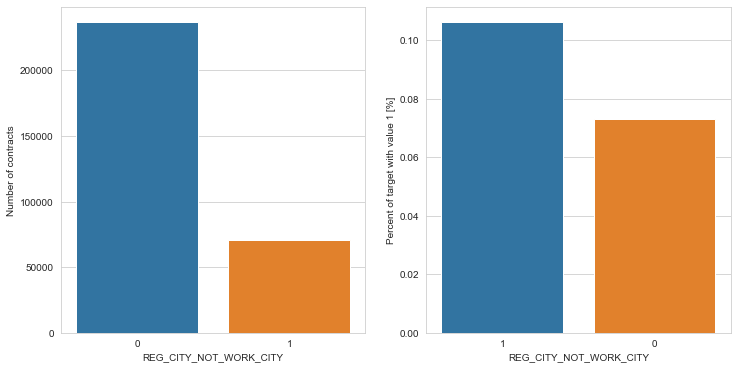

In [51]:
plot_stats('REG_CITY_NOT_WORK_CITY')

> Généralement, beaucoup plus de personnes s'inscrivent dans la ville où elles vivent ou travaillent (un plus grand nombre s'enregistre différemment dans la ville de travail que dans la ville de résidence).

> Ceux qui s'inscrivent dans une ville différente de la ville de travail ou de résidence ne remboursent plus fréquemment les prêts que ceux qui s'inscrivent dans la même ville (travaillent 11% ou vivent 12%).

### Analyse des Données de " BUREAU "

> Les données du " bureau " contiennent tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). \
> Pour chaque prêt de l'échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le bureau de crédit avant la date de la demande. \
> SK_ID_CURR est la clé reliant les données application_train|test aux données du bureau. \
> Fusionnons application_train avec bureau.

In [52]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [53]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


> Analysons maintenant les données application_bureau_train.

In [54]:
def plot_bureau_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

#### Analyse du Status du Credit

> Voyons la répartition du statut de crédit. Nous montrons d'abord le nombre de crédits par catégorie (peut être Fermé, Actif, Vendu et Créance irrécouvrable).

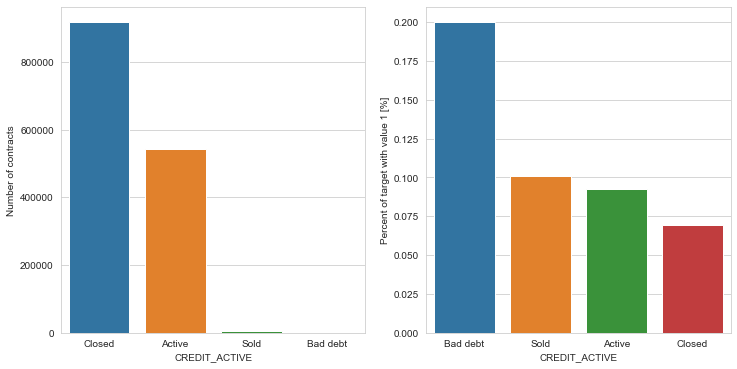

In [55]:
plot_bureau_stats('CREDIT_ACTIVE')

> La plupart des crédits enregistrés auprès du Credit Bureau ont le statut Closed (~900K). A la deuxième place se trouvent les crédits actifs (un peu moins de 600K). Les créances vendues et les créances irrécouvrables ne sont que quelques exemples.
>
> Dans le même temps, en tant que pourcentage ayant TARGET = 1 du nombre total par catégorie, les clients avec des crédits enregistrés auprès du bureau de crédit avec créances irrécouvrables ont un défaut de 20% sur les applications en cours.
>
> Les clients avec des crédits Vendus, Actifs et Fermés ont un pourcentage de CIBLE == 1 (crédit par défaut) égal ou inférieur à 10 % (10 % étant le taux global). Le plus petit taux de défaut de crédit a les clients avec des crédits enregistrés au bureau de crédit avec des crédits fermés.
> 
> Cela signifie que l'ancien historique de crédit enregistré (tel qu'enregistré auprès du bureau de crédit) est un bon prédicteur du crédit par défaut, car le pourcentage d'applications en défaut avec un historique de créance irrécouvrable est deux fois plus important que pour Vendu ou Actif et presque trois fois plus élevé que pour Fermé.

####  Analyse des Devises de crédit

> Vérifions maintenant le nombre de crédits enregistrés au Credit Bureau avec différentes devises. Vérifions également le pourcentage de crédits en défaut (pour les demandes en cours) par différentes devises de crédits enregistrés auprès du bureau de crédit dans le passé pour le même client.

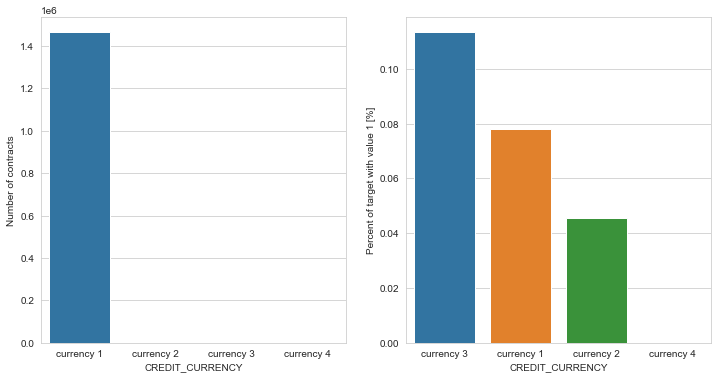

In [56]:
plot_bureau_stats('CREDIT_CURRENCY')

> Les crédits sont principalement en devise_1.
>
> Selon la devise, le pourcentage de clients défaillants est assez différent. 
> En commençant par currency_3, puis currency_1 et currency_2, le pourcentage de clients défaillants est de 11 %, 8 % et 5 %. 
> Le pourcentage d'applications défaillantes pour les clients qui ont des crédits enregistrés avec currency_4 est proche de 0.

#### Analyse du Type de Crédit

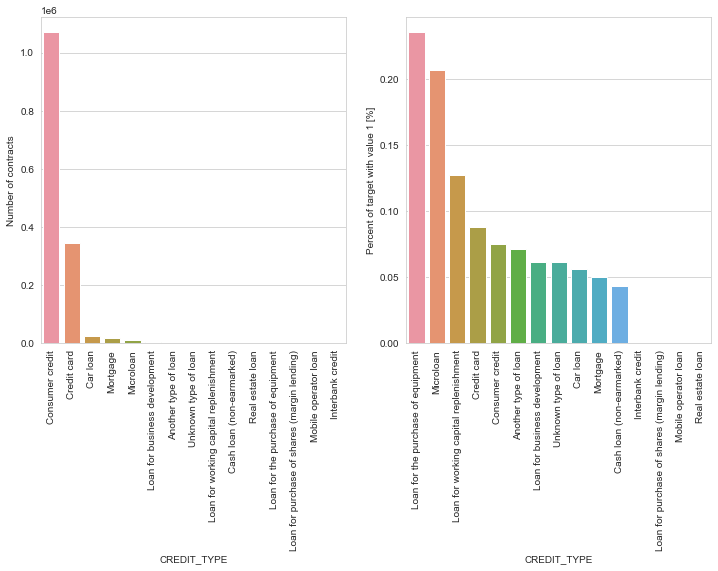

In [57]:
plot_bureau_stats('CREDIT_TYPE', True, True)

> La majorité des crédits historiques enregistrés auprès du Bureau de crédit sont le crédit à la consommation et la carte de crédit. Un plus petit nombre de crédits sont le prêt automobile, l'hypothèque et le microcrédit.
>
> En ce qui concerne maintenant les types de crédits historiques enregistrés auprès du bureau de crédit, il existe peu de types avec un pourcentage élevé de défauts de crédit actuels, comme suit :
>
> 1) Prêt pour l'achat d'équipement - avec plus de 20% de défauts de crédit en cours ; \
> 2) Microcrédit - avec plus de 20 % de défauts de paiement actuels ; \
> 3) Prêt pour la reconstitution du fonds de roulement - avec plus de 12% de défauts de paiement en cours.

#### Analyse de la Durée du crédit (DAYS_CREDIT)

In [60]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.histplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

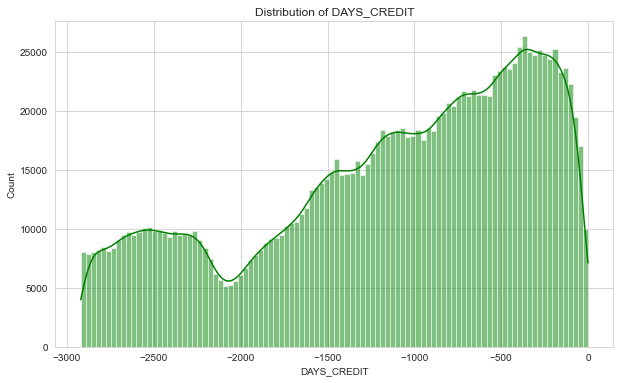

In [61]:
plot_b_distribution('DAYS_CREDIT','green')

> La durée du crédit (en jours) est comprise entre moins de 3000 jours (avec une selle locale autour de 2000 jours) et avec une fréquence croissante pour un nombre de jours plus court - et avec un pic autour de 300 jours (soit moins d'un an).

#### Analyse des Crédits en souffrance (CREDIT_DAY_OVERDUE)

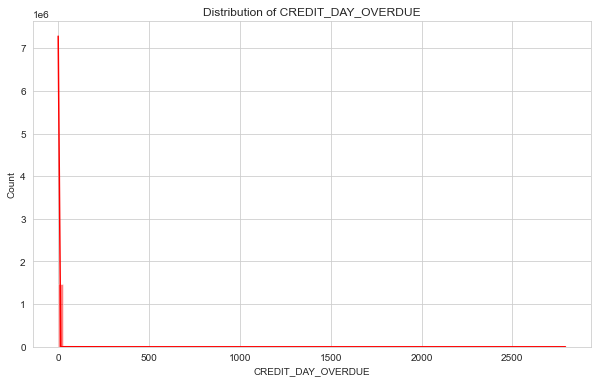

In [62]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

> La plupart des crédits ont 0 ou près de 0 jours de retard. Le nombre maximum de jours de crédit en souffrance est d'environ 3000 jours.

#### Analyse des Sommes des crédits (AMT_CREDIT_SUM)

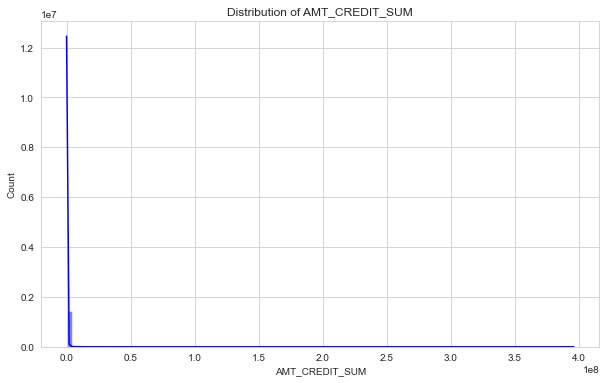

In [63]:
plot_b_distribution('AMT_CREDIT_SUM','blue')

> La distribution de l'AMT_CREDIT_SUM montre une concentration des crédits pour la plage de somme de crédit inférieure.
> Supprimons les valeurs aberrantes pour mieux voir la distribution autour de 0.
> Introduisons une fonction pour identifier et filtrer les valeurs aberrantes (avec un seuil prédéfini).
> Ensuite, modifions également la fonction pour afficher une distribution, cette fois en utilisant la fonction pour filtrer les valeurs aberrantes.

<ipython-input-64-19f619ce7fd1>:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


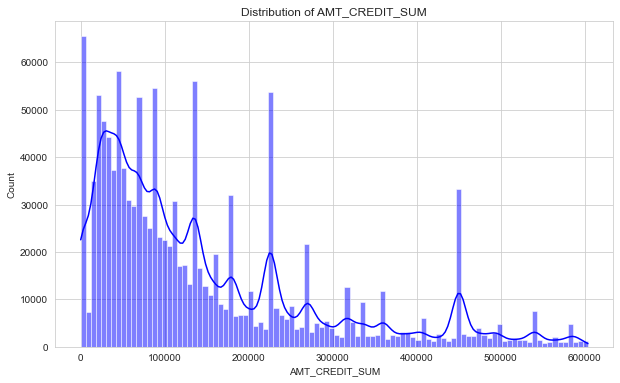

In [64]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_b_o_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = application_bureau_train[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.histplot(filtered,color=color, kde=True,bins=100)
    plt.show() 

plot_b_o_distribution('AMT_CREDIT_SUM','blue')

> Nous pouvons observer que la fonction de distribution montre plusieurs pics et la concentration maximale des valeurs est d'environ 20 000 mais nous voyons également plusieurs autres pics à des valeurs plus élevées.

#### Analyse de la Limite du montant du crédit (AMT_CREDIT_SUM_LIMIT)

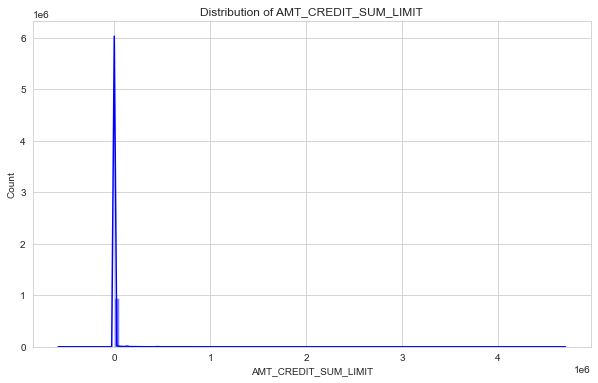

In [65]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','blue')

#### Analyse Comparative des valeurs d'intervalle avec TARGET = 1 et TARGET = 0

> Comparons la distribution des valeurs d'intervalle tracée ci-dessus pour les valeurs de CIBLE = 1 et CIBLE = 0

In [69]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_bureau_train.loc[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train.loc[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw_adjust=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw_adjust=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12, rotation=60)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 432x288 with 0 Axes>

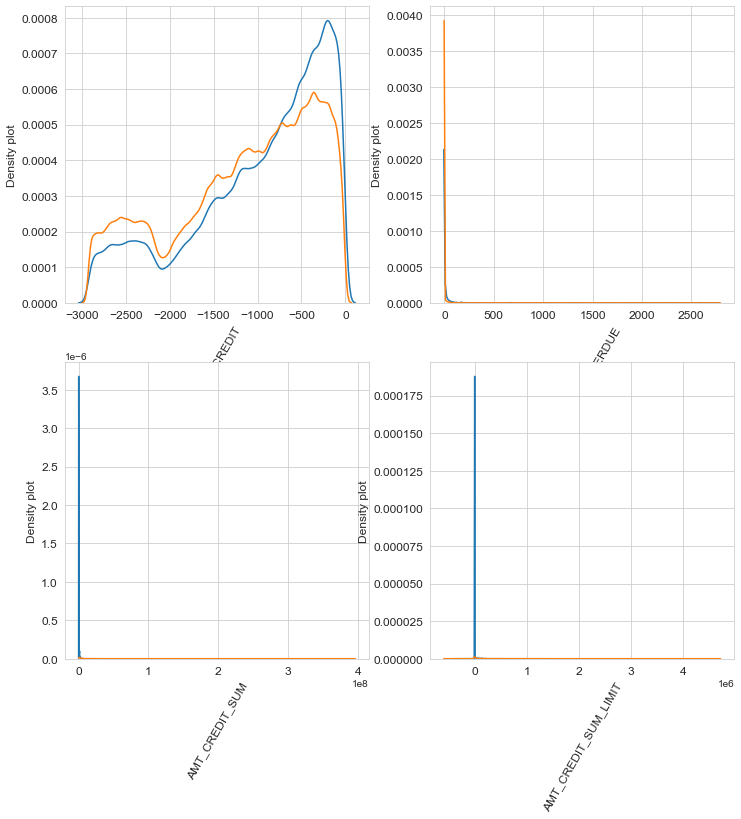

In [70]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

### Analyse des Données d'application Bancaire antérieures

> Le dataframe previous_application contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des crédits dans l'échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données. SK_ID_CURR est la clé reliant les données application_train|test aux données previous_application.

> Fusionnons application_train avec previous_application.

In [71]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR',
                                                 right_on='SK_ID_CURR', how='inner')

In [72]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ", 
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


In [73]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_prev_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

#### Analyse des Types de Contrats de Prêt Bancaire 

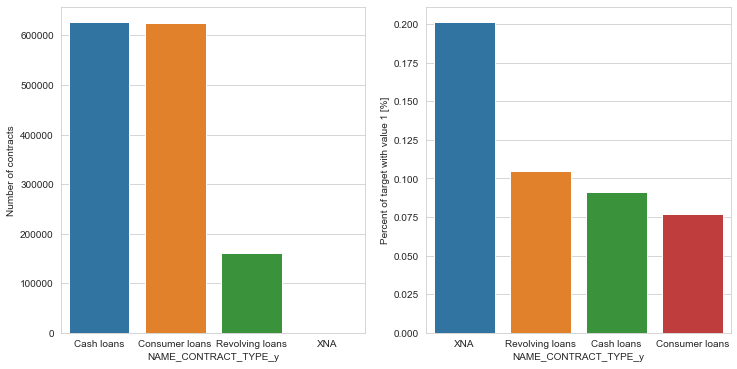

In [74]:
plot_p_stats('NAME_CONTRACT_TYPE_y')

> Il existe trois types de contrat dans les données de l'application bancaire précédente : \
        <1> Prêts de trésorerie ("Cash Loan"), \
        <2> Prêts à la consommation, \
        <3> Prêts renouvelables.
>
> Les prêts de trésorerie et les prêts à la consommation sont presque au même nombre (~600K) tandis que les prêts renouvelables sont d'environ 150K.

> Le pourcentage de prêts par défaut pour les clients avec des demandes antérieures est différent pour le type de contrats de demandes antérieures : \
        <4> passant d'environ 10 % pour les prêts renouvelables, \
        <5> puis d'environ 9,5 % pour les prêts en espèces et, \
        <6> d'environ 8 % pour les prêts à la consommation.

#### Analyse de l'Objectif des Prêts de trésorerie

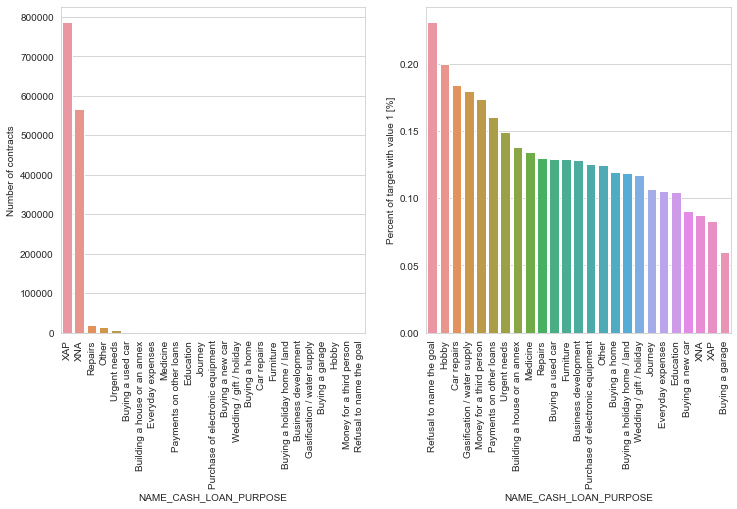

In [75]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

> Outre les catégories non identifiées ("XAP")/non disponibles ("XNA"), les plus grands nombres de contrats sont : \
    <1> Réparations, \
    <2> Autre, \
    <3> Besoins urgents, \
    <4> Achat d'une voiture d'occasion, \
    <5> Construction d'une maison ou d'une annexe
>
> En termes de pourcentage de défauts pour les demandes en cours dans l'échantillon, les pourcentages de défauts les plus élevés sont : \
    <6> les clients ayant un historique de demandes précédentes de prêts d'argent pour motif " Refus de nommer l'objectif " (23 %), \
    <7> Hobby (20 %), \
    <8> Réparation automobile (18 %).

#### Analyse du Status des Contrats de Prêt

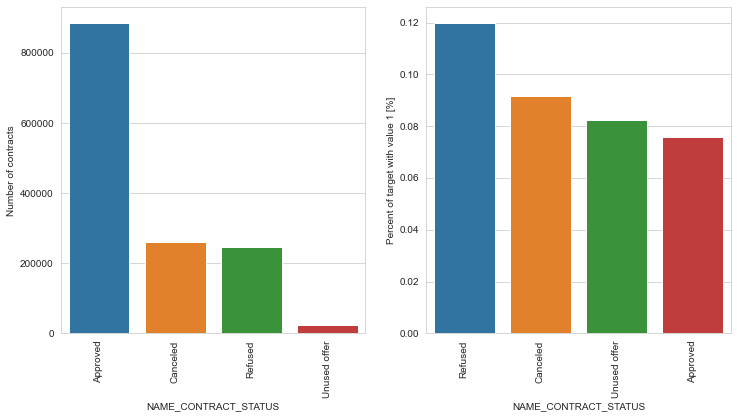

In [76]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

> La plupart des statuts de contrat ici sont " Approuvés " (850K), \
> Ensuite, des contrats aux statuts " Annulé " et " Refusé " (240K), \
> Il n'y a que ~20K en statut Offre inutilisée.
>
> En termes de pourcentage de défauts, les clients ayant le plus grand pourcentage de défauts lorsque, les statuts de contrat sont : \
    <1> Refusé (12 %), \
    <2> suivis par Annulé (9 %), \
    <3> Offre inutilisée (~8 %), \
    <4> Approuvé (pourcentage le plus faible de défauts dans les applications actuelles, avec moins de 8 %).

#### Analyse du Type de paiement

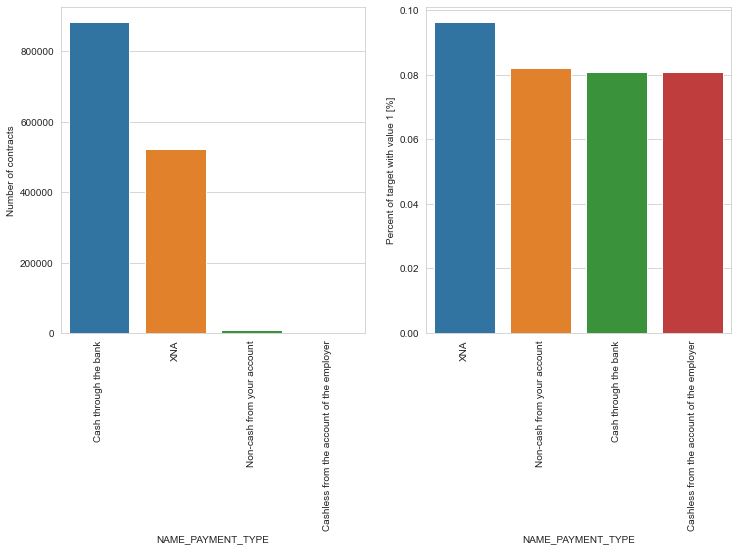

In [77]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

> La plupart des demandes précédentes ont été payées en espèces via la banque (~ 850K). 
> Les paiements utilisant le Non-cash de votre compte ou le Cashless du compte de l'employeur sont très rares. 
> Ces trois types de paiements dans les applications précédentes entraînent presque le même pourcentage de défauts pour les clients actuels (environ 8 % chacun).

#### Analyse du Client Type

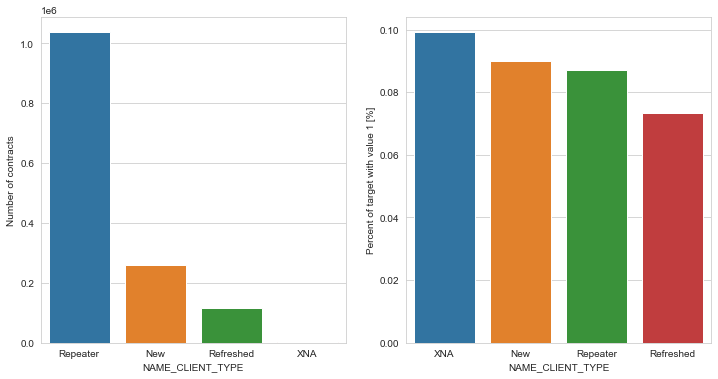

In [78]:
plot_p_stats('NAME_CLIENT_TYPE')

> La plupart sont des clients type " Répéteur " (~1M), 
> un peu plus de 200K sont nouvelles et,
> ~100K sont actualisées.
>
> En termes de pourcentage par défaut propre aux types de clients : \
    <1> non disponibles ("XNA") (9,95 %), \
    <2> Nouveau (9 %), \
    <3> Répéteur (8,6 %), \
    <4> Actualisé (7 %).

# Fin de l'Analyse_des_Données_EDA

In [2]:
print('\n'.join([''.join([(' I_Love_Data_Science_'[(x-y) % len('I_Love_Data_Science_')] 
                           if ((x*0.05)**2+(y*0.1)**2-1)**3-(x*0.05)**2*(y*0.1)**3 <= 0 else ' ') 
                          for x in range(-30, 30)]) 
                 for y in range(15, -15, -1)]))

                                                            
                                                            
                                                            
                cience I_           cience I_               
            a_Science I_Love_   a_Science I_Love_           
          ta_Science I_Love_Data_Science I_Love_Dat         
         ta_Science I_Love_Data_Science I_Love_Data_        
        ta_Science I_Love_Data_Science I_Love_Data_Sc       
        a_Science I_Love_Data_Science I_Love_Data_Sci       
        _Science I_Love_Data_Science I_Love_Data_Scie       
        Science I_Love_Data_Science I_Love_Data_Scien       
        cience I_Love_Data_Science I_Love_Data_Scienc       
        ience I_Love_Data_Science I_Love_Data_Science       
         nce I_Love_Data_Science I_Love_Data_Science        
          e I_Love_Data_Science I_Love_Data_Science         
           I_Love_Data_Science I_Love_Data_Science          
            Love_Data_Sc